In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('E:\BI\Python for data science\playstore-analysis (2) (1).csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [5]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
data.shape

(10841, 13)

In [7]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## 1. Data clean up – Missing value treatment 
## a. Drop records where rating is missing since rating is our target/study variable

In [8]:
data['Rating'].isna().sum()

1474

In [9]:
data.dropna(subset=['Rating'], inplace= True)
data.shape

(9367, 13)

## b. Check the null values for the Android Ver column.
## i. Are all 3 records having the same problem?

In [10]:
data[data['Android Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


## ii. Drop the 3rd record i.e. record for “Life Made WIFI ...”

In [11]:
data = data.drop((data[(data.App == 'Life Made WI-Fi Touchscreen Photo Frame')].index))
data.shape

(9366, 13)

## iii. Replace remaining missing values with the mode

In [12]:
val = data['Android Ver'].mode()
print(val)
data[['Android Ver']] = data[['Android Ver']].fillna(value=val[0])

0    4.1 and up
dtype: object


In [13]:
data.iloc[[4280]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,4.1 and up


In [14]:
data.iloc[[4308]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,4.1 and up


## c. Current ver – replace with most common value

In [15]:
data[data['Current Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [16]:
val2 = data['Current Ver'].mode()
print(val2[0])

Varies with device


In [17]:
data['Current Ver'].fillna(val2[0], inplace=True)

In [18]:
data.iloc[[15]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",Varies with device,4.2 and up


## 2. Data clean up – correcting the data types
## a. Which all variables need to be brought to numeric types?

In [19]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

## Reviews , installs, price, need to be converted into float and int  
## Last Updated needs to be converted into datatime format

## b. Price variable – remove  $ sign and convert to float

In [20]:
data.Price = data['Price'].str.split("$").str[-1].astype('float')

## c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [21]:
data['Installs'] = data['Installs'].str.replace(',','')
data['Installs'] = data['Installs'].str.replace('+','').astype('int')

##  d. Convert all other identified columns to numeric

In [22]:
data.Reviews = data.Reviews.astype('float')

In [23]:
data['Last Updated']= pd.to_datetime(data['Last Updated'])

## 3. Sanity checks – check for the following and handle accordingly
## a. Avg. rating should be between 1 and 5, as only these values are allowed on the playstore.
## i. Are there any such records? Drop if so.

In [24]:
data[data['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


## b. Reviews should not be more than installs as only those who installed can review the app.
## i. Are there any such records? Drop if so.

In [25]:
j = data[data['Reviews'] > data['Installs']].index
data[data['Reviews'] > data['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4.0,25000.000000,1,Free,0.00,Everyone,Medical,2018-08-02,1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249.0,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,2018-07-30,Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2.0,20000.000000,1,Paid,1.49,Everyone,Arcade,2017-02-08,1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7.0,19000.000000,5,Free,0.00,Everyone,Arcade,2018-07-23,1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11.0,6100.000000,10,Free,0.00,Everyone,Arcade,2017-03-11,0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20.0,4200.000000,10,Free,0.00,Teen,Social,2018-07-23,1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2.0,16000.000000,1,Paid,0.99,Everyone,Arcade,2017-03-03,1.0,2.3 and up


In [26]:
data = data.drop(j)

## 4. Identify and handle outliers –
## a. Price column
## i. Make suitable plot to identify outliers in price

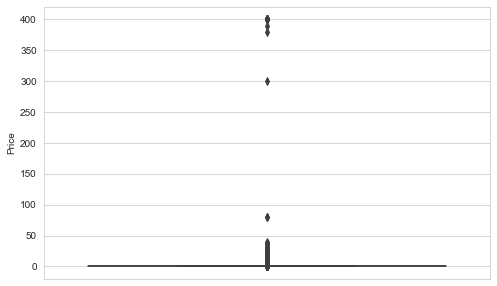

In [27]:
plt.figure(figsize=(8,5))
sns.boxplot(y=data['Price'])

## ii. Do you expect apps on the play store to cost $200? Check out these cases

In [28]:
data[data['Price'] > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6.0,1500.0,100,Paid,399.99,Everyone,Entertainment,2018-07-16,1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,26000.0,10000,Paid,399.99,Everyone,Lifestyle,2018-03-11,1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7300.0,10000,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547.0,1800.0,100000,Paid,399.99,Everyone,Lifestyle,2018-01-12,2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856.0,8700.0,10000,Paid,399.99,Everyone,Entertainment,2018-05-19,3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411.0,2600.0,10000,Paid,299.99,Everyone,Lifestyle,2018-07-21,1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867.0,4700.0,50000,Paid,399.99,Everyone,Finance,2017-11-12,1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41.0,2900.0,1000,Paid,379.99,Everyone,Lifestyle,2018-07-01,1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93.0,22000.0,1000,Paid,399.99,Everyone,Finance,2017-12-11,1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472.0,965.0,5000,Paid,399.99,Everyone,Finance,2017-05-01,3.4,4.4 and up


## Most Costly App in Play Store

In [29]:
data[data.Price == data.Price.max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7300.0,10000,Paid,400.0,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up


## iii. After dropping the useless records, make the suitable plot again to identify outliers
## iv. Limit data to records with price < $30

In [30]:
data = data[data['Price'] < 30]

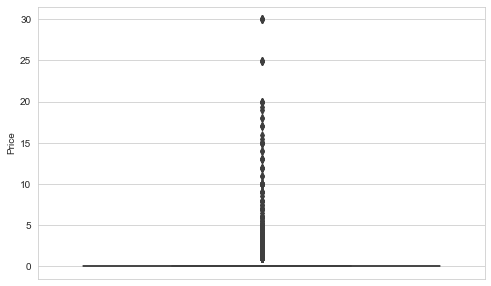

In [31]:
plt.figure(figsize=(8,5))
sns.boxplot(y=data['Price'])

## b. Reviews column
## i. Make suitable plot

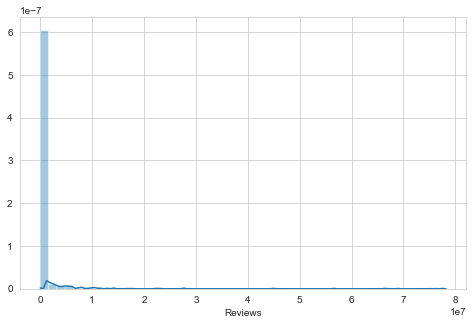

In [32]:
plt.figure(figsize=(8,5))
sns.distplot(data.Reviews)

## Most Reviewd Applications in Google Play Store

In [33]:
data[data.Reviews>40000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847.0,21516.529524,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,21516.529524,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,21516.529524,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578.0,21516.529524,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
1670,Clash of Clans,GAME,4.6,44891723.0,98000.000000,100000000,Free,0.0,Everyone 10+,Strategy,2018-07-15,10.322.16,4.1 and up
1704,Clash of Clans,GAME,4.6,44891723.0,98000.000000,100000000,Free,0.0,Everyone 10+,Strategy,2018-07-15,10.322.16,4.1 and up
1879,Clash of Clans,GAME,4.6,44893888.0,98000.000000,100000000,Free,0.0,Everyone 10+,Strategy,2018-07-15,10.322.16,4.1 and up
2544,Facebook,SOCIAL,4.1,78158306.0,21516.529524,1000000000,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313.0,21516.529524,1000000000,Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446.0,21516.529524,1000000000,Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device


## Since we see that there are duplicate values in our data we drop them.

In [34]:
data.drop_duplicates(subset='App',keep='last', inplace=True)

In [35]:
data[data.Reviews>40000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672.0,21516.529524,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917.0,21516.529524,1000000000,Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device
3943,Facebook,SOCIAL,4.1,78128208.0,21516.529524,1000000000,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device
3986,Clash of Clans,FAMILY,4.6,44881447.0,98000.000000,100000000,Free,0.0,Everyone 10+,Strategy,2018-07-15,10.322.16,4.1 and up
4005,Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,42916526.0,21516.529524,500000000,Free,0.0,Everyone,Tools,2018-08-03,Varies with device,Varies with device
4104,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847.0,21516.529524,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device


In [36]:
# After dropping the duplicate values as well
data.shape

(8170, 13)

## ii. Limit data to apps with < 1 Million reviews

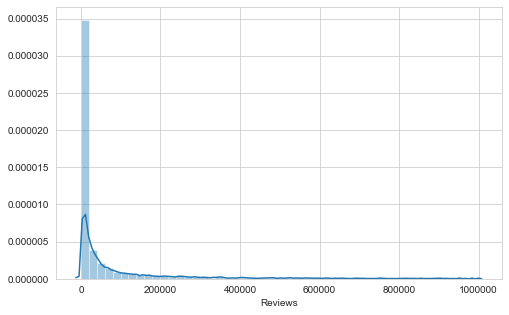

In [37]:
plt.figure(figsize=(8,5))
data = data[data['Reviews'] < 1000000]
sns.distplot(data.Reviews)

## c. Installs
## i. What is the 95th percentile of the installs?

In [38]:
print(np.percentile(data['Installs'], 95))

10000000.0


## ii. Drop records having a value more than the 95th percentile

In [39]:
k = data[data['Installs'] > np.percentile(data['Installs'],95)].index
data[data['Installs'] > np.percentile(data['Installs'],95)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.000000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
188,Indeed Job Search,BUSINESS,4.3,674730.0,21516.529524,50000000,Free,0.0,Everyone,Business,2018-05-21,Varies with device,Varies with device
225,Secure Folder,BUSINESS,3.8,14760.0,8600.000000,50000000,Free,0.0,Everyone,Business,2018-01-31,1.1.07.6,7.0 and up
292,Docs To Go™ Free Office Suite,BUSINESS,4.1,217730.0,21516.529524,50000000,Free,0.0,Everyone,Business,2018-04-02,Varies with device,Varies with device
348,Contacts,COMMUNICATION,4.3,66602.0,21516.529524,50000000,Free,0.0,Everyone,Communication,2018-06-26,2.8.4.201036949,5.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10408,Shoot Hunter-Gun Killer,GAME,4.3,320334.0,27000.000000,50000000,Free,0.0,Teen,Action,2018-08-08,1.1.2,4.1 and up
10429,Talking Tom Bubble Shooter,FAMILY,4.4,687136.0,54000.000000,50000000,Free,0.0,Everyone,Casual,2018-05-25,1.5.3.20,4.1 and up
10513,Flight Simulator: Fly Plane 3D,FAMILY,4.0,660613.0,21000.000000,50000000,Free,0.0,Everyone,Simulation,2017-03-01,1.32,2.3 and up
10549,Toy Truck Rally 3D,GAME,4.0,301895.0,25000.000000,50000000,Free,0.0,Everyone,Racing,2018-05-23,1.4.4,4.1 and up


In [40]:
data = data.drop(k)

## Data analysis to answer business questions
## 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

## a. How do you explain this?

The skewness of this distribution is -1.685458574695199
The Median of this distribution is 4.3 which is greater than mean 4.160476624560497 of this distribution


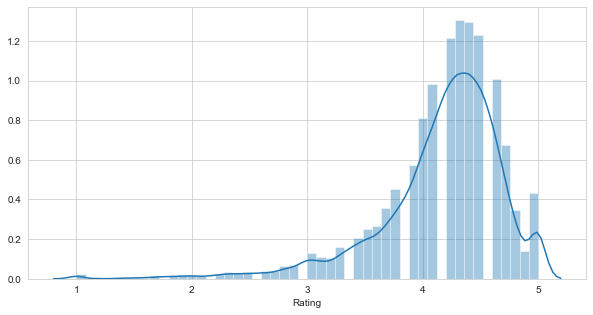

In [41]:
plt.figure(figsize=(10,5))
sns.distplot(data.Rating)
print('The skewness of this distribution is',data['Rating'].skew())
print('The Median of this distribution is {} which is greater than mean {} of this distribution'.format(data.Rating.median(),data.Rating.mean()))

In [42]:
data.Rating.mode()

0    4.3
dtype: float64

## b. What is the implication of this on your analysis?

## Since mode>= median > mean, the distribution of Rating is Negatively Skewed.Therefore distribution of Rating is more Skewed towards lower values. So we can say that the distribution of the data is unequal.

## 6. What are the top Content Rating values?

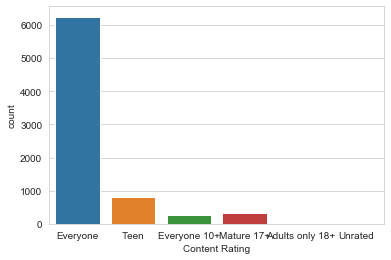

In [43]:
sns.countplot(data['Content Rating'])

## a. Are there any values with very few records?

In [44]:
data[data['Content Rating'] == 'Adults only 18+']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
298,Manga Master - Best manga & comic reader,COMICS,4.6,24005.0,4900.000000,500000,Free,0.0,Adults only 18+,Comics,2018-07-04,1.1.7.0,4.1 and up
3043,DraftKings - Daily Fantasy Sports,SPORTS,4.5,50017.0,41000.000000,1000000,Free,0.0,Adults only 18+,Sports,2018-07-24,3.21.324,4.4 and up
6424,Manga Books,COMICS,3.8,7326.0,21516.529524,500000,Free,0.0,Adults only 18+,Comics,2018-08-03,Varies with device,Varies with device


In [45]:
data[data['Content Rating'] == 'Unrated']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8266,DC Universe Online Map,TOOLS,4.1,1186.0,6400.0,50000,Free,0.0,Unrated,Tools,2012-02-27,1.3,2.3.3 and up


## b. If yes, drop those as they won’t help in the analysis

In [46]:
a = data[data['Content Rating'] == 'Adults only 18+'].index
b = data[data['Content Rating'] == 'Unrated'].index
data = data.drop(a)
data = data.drop(b)

## 7. Effect of size on rating
## a. Make a joinplot to understand the effect of size on rating

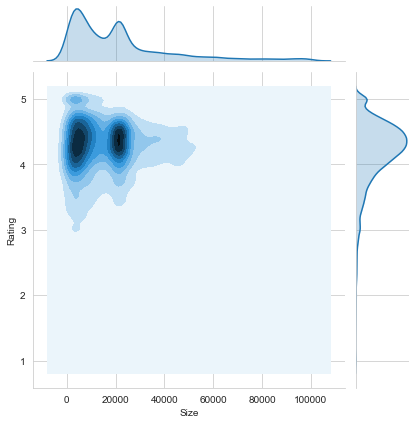

In [47]:
sns.jointplot(data=data, x='Size', y='Rating',kind="kde", hue='Type')

## b. Do you see any patterns?

## Yes we can see a pattern. The size and the rating must be positively correlated. 

## c. How do you explain the pattern?

## We see that most of the applications are highly rated in the google play store and even the applications of the lager size have a fairly high rating distribution. We can also see for a certain region that on increasing the size of the application the rating is also increaasing.

## 8. Effect of price on rating
## a. Make a jointplot (with regression line)

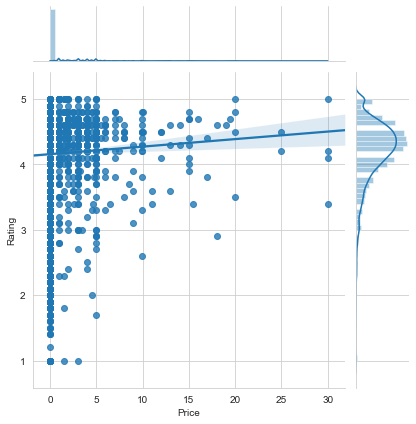

In [48]:
sns.jointplot(data=data, x='Price', y='Rating',kind="reg")

## b. What pattern do you see?

## Generally on increasing the Price, Rating remains almost constant greater than 4.

## c. How do you explain the pattern?

## Since on increasing the Price, Rating remains almost constant greater than 4. Thus it can be concluded that their is very weak Positive correlation between Rating and Price.

In [49]:
data.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.145610,0.048483,0.100340,0.033671
Reviews,0.145610,1.000000,0.199140,0.731816,-0.067643
Size,0.048483,0.199140,1.000000,0.186042,0.003926
Installs,0.100340,0.731816,0.186042,1.000000,-0.104258
Price,0.033671,-0.067643,0.003926,-0.104258,1.000000


## d. Replot the data, this time with only records with price > 0

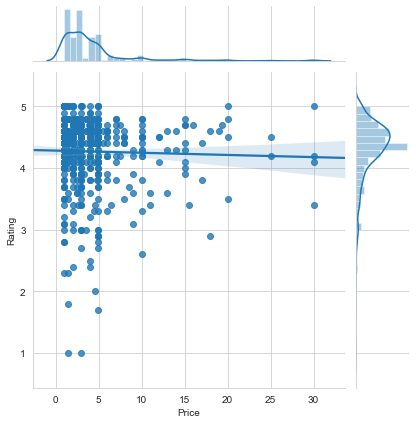

In [50]:
df1 = data[data['Price'] > 0]
sns.jointplot(data=df1, x='Price', y='Rating',kind="reg")

## e. Does the pattern change?

## Yes, On limiting the record with Price > 0, the overall pattern changed a bit. Their is very weakly Negative Correlation between Price and Rating.

In [51]:
df1.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.098464,0.115825,0.063827,-0.026861
Reviews,0.098464,1.000000,0.162456,0.782826,-0.035756
Size,0.115825,0.162456,1.000000,0.114089,0.029280
Installs,0.063827,0.782826,0.114089,1.000000,-0.055379
Price,-0.026861,-0.035756,0.029280,-0.055379,1.000000


## f. What is your overall inference on the effect of price on the rating

## We dont get to see a trend of higher rating with the increase in the price of the application. Although most of the applications are rated above 4 priced and unpriced. We see that most of the priced applications are below 7 dollars.

## 9. Look at all the numeric interactions together –
### a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

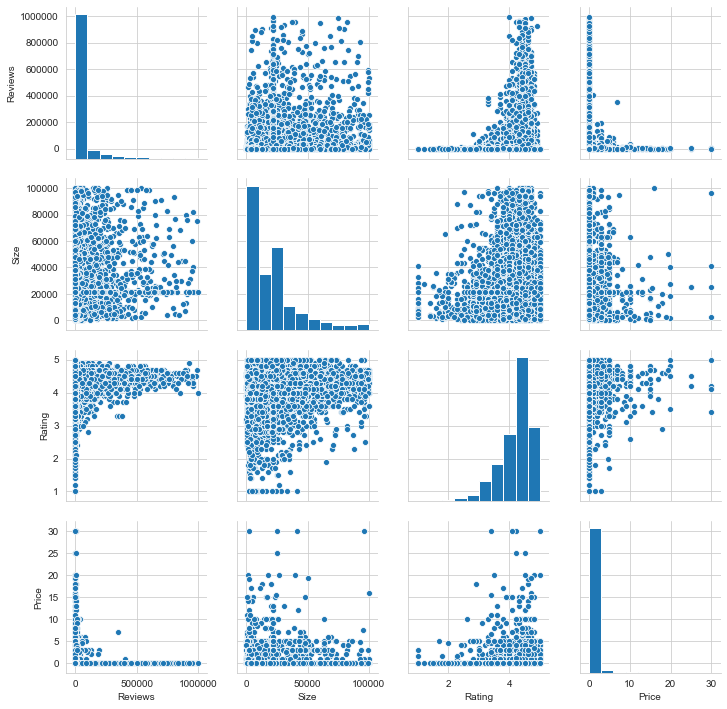

In [52]:
sns.pairplot(data[['Reviews', 'Size', 'Rating', 'Price']],kind="scatter")

## 10. Rating vs. content rating
## a. Make a bar plot displaying the rating for each content rating

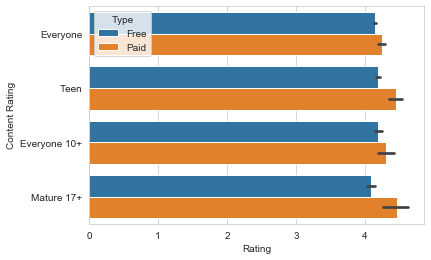

In [53]:
sns.barplot(y=data['Content Rating'], x = data['Rating'], hue=data['Type'])

## b. Which metric would you use? Mean? Median? Some other quantile?

## We must use Median in this case as we are having Outliers in Rating. Because in case of Outliers , median is the best measure of central tendency.

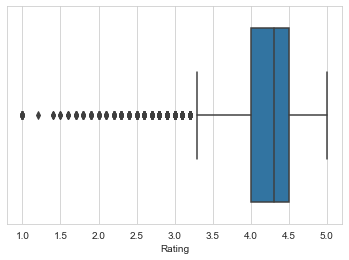

In [54]:
sns.boxplot(data['Rating'])

In [55]:
print(data['Rating'].mode())
data['Rating'].median()

0    4.3
dtype: float64


4.3

## c. Choose the right metric and plot

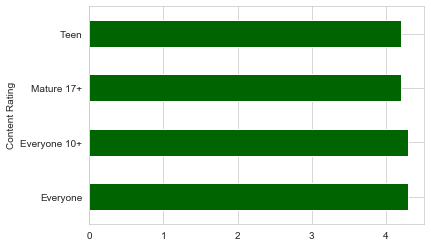

In [56]:
data.groupby(['Content Rating'])['Rating'].median().plot.barh(color="darkgreen")
plt.show()

## 11. Content rating vs. size vs. rating – 3 variables at a time
## a. Create 5 buckets (20% records in each) based on Size

In [57]:
bins=[0, 20000, 40000, 60000, 80000, 100000]
df1['Bucket Size'] = pd.cut(data['Size'], bins, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])
pd.pivot_table(df1, values='Rating', index='Bucket Size', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,4.195876,4.308333,3.500000,4.422222
20k-40k,4.302308,4.284615,4.480000,4.688889
40k-60k,4.313953,4.100000,4.533333,4.514286
60k-80k,4.450000,4.500000,NaN,4.200000
80k-100k,4.283333,4.550000,5.000000,4.225000


## b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [58]:
temp3=pd.pivot_table(df1, values='Rating', index='Bucket Size', columns='Content Rating', aggfunc=lambda x:np.quantile(x,0.2))
temp3

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,3.90,4.12,3.5,4.24
20k-40k,4.10,4.14,4.2,4.56
40k-60k,3.94,3.98,4.3,4.32
60k-80k,4.20,4.50,NaN,4.02
80k-100k,4.20,4.46,5.0,3.96


## c. Make a heatmap of this
## i. Annotated

(5.0, 0.0)

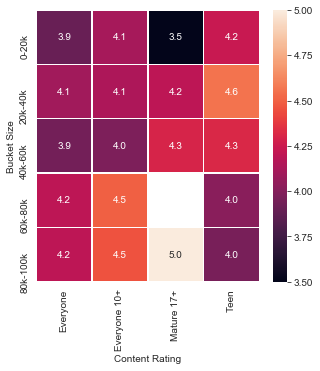

In [68]:
f,ax = plt.subplots(figsize=(5, 5))
ax = sns.heatmap(temp3, annot=True,linewidths=.5, fmt='.1f') 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## i. Greens color map

(5.0, 0.0)

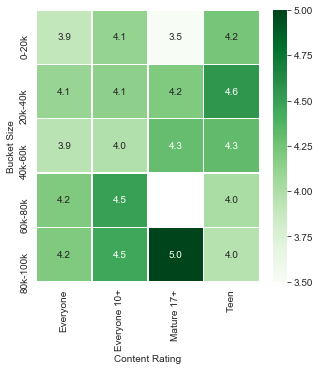

In [69]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(temp3, annot=True, linewidths=.5, cmap='Greens',fmt='.1f')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

## Based on analysis, its not true that lighter apps are preferred in all categories. Because apps with size 40k-60k and 80k-100k have got the highest rating in all cateegories. So, in general we can conclude that heavier apps are preferred in all categories.

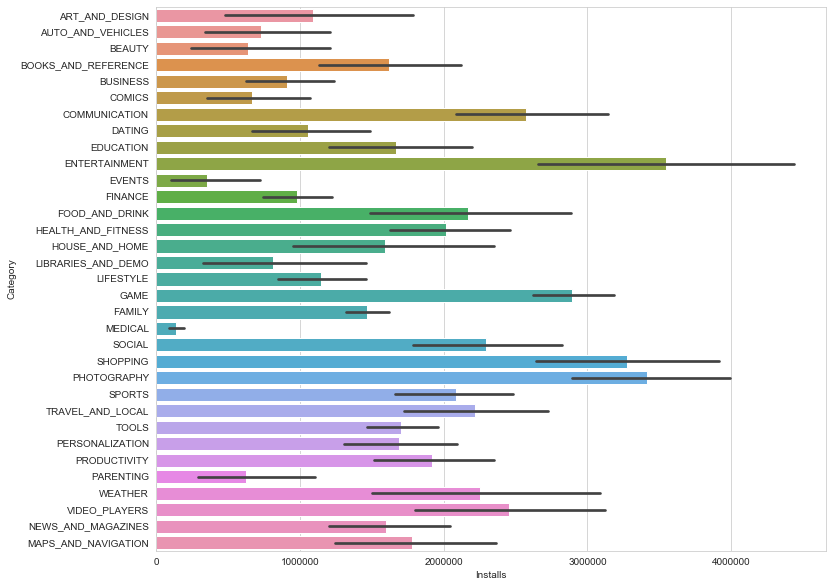

In [136]:
plt.figure(figsize=(12,10))
sns.barplot(y=data['Category'],x=data['Installs'])

## The trending categories in Google Play Store are Entertainment, Photography, Shopping, Gaming and Communications which are downloaded the most number of times by the people.